# Домашнее задание "Визуализация данных и описательная статистика"
Попробуем провести базовую разведку данных (EDA).

## Вам предложено два датасета на выбор: про машины и про зарплаты.

Превью данных и прямые ссылки на raw-файлы — ниже.

Информация по первому набору:

* Brand: Марка или производитель автомобиля..
* Color: Цвет кузова автомобиля.
* Model: Конкретная модель автомобиля.
* Registration Date: Дата, когда автомобиль был зарегистрирован (месяц/год).
* Year of Production:  Год, в котором был изготовлен автомобиль.
* Price in Euro: Цена автомобиля в евро.
* Power: Мощность автомобиля в киловаттах (кВт) и лошадиных силах (л.с.).
* Transmission Type:  Тип коробки передач (например, автоматическая, механическая).
* Fuel Type: Тип топлива, необходимый автомобилю.
* Fuel Consumption: Информация о расходе топлива автомобилем в л/100 км и г/км.
* Mileage: Общее расстояние, пройденное автомобилем в км.
* Offer Description: Дополнительное описание, предоставленное в предложении автомобиля.

Информация по второму набору:

* Age: Возраст лиц в наборе данных, представляющий их хронологический возраст в годах..
* Gender: Гендерная идентификация лиц, указывающая их пол или гендерную идентичность.
* Education Level: Наивысший уровень образования, достигнутый лицами, указывающий их образовательную квалификацию или ученую степень.
* Job Title: Род занятий или название должности физических лиц с указанием их профессиональной роли или должности.
* Years of Experience: Количество лет профессионального опыта, накопленного физическими лицами в их соответствующих областях.
* Salary: Уровень дохода или оклад, получаемый физическими лицами, обозначающий их денежную компенсацию.
* Country:  Страна проживания или происхождения физических лиц, предоставляющая географическую информацию.
* Race: Расовое происхождение или этническая принадлежность физических лиц, отражающая их конкретную расовую или этническую группу.

Вы также можете использовать любые другие данные на ваш выбор, но убедитесь, что в ноутбуке оставлены аутпуты ячеек, а также указан источник, с которым вы работали.
# Задание:
* Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.
* Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.
* Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
car = pd.read_csv("D:\\Нетология python\\Статистика_в_Python\\основы_EDA\\german_used_cars.csv")
sals = pd.read_csv("D:\\Нетология python\\Статистика_в_Python\\основы_EDA\\salary_dataset.csv")


In [6]:
car.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             250880 non-null  float64
 7   power_kw                  250786 non-null  float64
 8   power_ps                  250869 non-null  float64
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  44 non-null      float64
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [12]:
# Приведите столбцы 'price_in_euro', 'power_kw', 'power_ps' и 'mileage_in_km' к типу float64
# car['year'] = car.to_numeric(car['year'], errors='coerce')
# Приведите столбец 'year' к типу int, игнорируя NaN значения
car['year'] = car['year'].astype(pd.Int64Dtype(), errors='ignore')
car['price_in_euro'] = pd.to_numeric(car['price_in_euro'], errors='coerce')
car['power_kw'] = pd.to_numeric(car['power_kw'], errors='coerce')
car['power_ps'] = pd.to_numeric(car['power_ps'], errors='coerce')
car['fuel_consumption_l_100km'] = pd.to_numeric(car['fuel_consumption_l_100km'], errors='coerce')

# Выведите информацию о типах данных столбцов
# car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             250880 non-null  float64
 7   power_kw                  250786 non-null  float64
 8   power_ps                  250869 non-null  float64
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  44 non-null      float64
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [5]:
car.describe()

,Unnamed: 0,price_in_euro,power_kw,power_ps,mileage_in_km
count,251079.000000,2.508800e+05,250786.000000,250869.000000,2.509270e+05
mean,125539.000000,2.613753e+04,126.477379,171.809526,8.534002e+04
std,72480.408456,3.698795e+04,75.301763,99.192201,7.871706e+04
min,0.000000,1.200000e+02,1.000000,1.000000,0.000000e+00
25%,62769.500000,1.199000e+04,82.000000,111.000000,2.490400e+04
50%,125539.000000,1.989000e+04,110.000000,150.000000,6.750000e+04
75%,188308.500000,2.995000e+04,140.000000,190.000000,1.265000e+05
max,251078.000000,5.890500e+06,2023.000000,2022.000000,3.800000e+06


In [24]:
car.isna().mean() * 100

Unnamed: 0                   0.000000
brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.001593
year                         0.077665
price_in_euro                0.079258
power_kw                     0.116696
power_ps                     0.083639
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.703006
fuel_consumption_g_km        0.000000
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [13]:
car.groupby("power_ps")["fuel_consumption_l_100km"].median()

power_ps
1.0      NaN
5.0      NaN
7.0      NaN
8.0      NaN
11.0     NaN
          ..
2018.0   NaN
2019.0   NaN
2020.0   NaN
2021.0   NaN
2022.0   NaN
Name: fuel_consumption_l_100km, Length: 520, dtype: float64

===============================================================================================================

In [5]:
sals.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [6]:
sals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [7]:
sals.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [8]:
sals.isna().mean() * 100

Unnamed: 0             0.000000
Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
Country                0.000000
Race                   0.000000
dtype: float64

In [15]:
#отличается уровень зарплаты от бразования 

sals.groupby("Education Level")["Salary"].median()

Education Level
Bachelor's           130000.0
Bachelor's Degree     75000.0
High School           30000.0
Master's             177500.0
Master's Degree      122000.0
PhD                  170000.0
phD                  120000.0
Name: Salary, dtype: float64

In [14]:
#отличается уровень зарплаты от страны 

sals.groupby("Country")["Salary"].median()

Country
Australia    115000.0
Canada       120000.0
China        115920.0
UK           115000.0
USA          110000.0
Name: Salary, dtype: float64

In [13]:
#отличается уровень зарплаты от пола 

sals.groupby("Gender")["Salary"].median()

Gender
Female    105000.0
Male      120000.0
Other     158610.0
Name: Salary, dtype: float64

In [9]:
#отличается ли ЗП от возраста 

sals.groupby("Age")["Salary"].median()

Age
21.0     25000.0
22.0     25000.0
23.0     50000.0
24.0     48132.5
25.0     60000.0
26.0     55000.0
27.0     70000.0
28.0     70000.0
29.0     75000.0
30.0     95000.0
31.0    120000.0
32.0    120000.0
33.0    123520.5
34.0    140000.0
35.0    120000.0
36.0    139413.0
37.0    150000.0
38.0    136449.0
39.0    145000.0
40.0    150000.0
41.0    151315.0
42.0    170000.0
43.0    162000.0
44.0    162037.5
45.0    180000.0
46.0    180000.0
47.0    178859.0
48.0    190000.0
49.0    185000.0
50.0    190000.0
51.0    190000.0
52.0    186963.0
53.0    181714.0
54.0    192103.5
55.0    193964.0
56.0    195000.0
57.0    191790.0
58.0    195000.0
60.0    188651.0
61.0    200000.0
62.0    200000.0
Name: Salary, dtype: float64

In [10]:
#отличается ли ЗП от профессии 

sals.groupby("Job Title")["Salary"].median()

Job Title
Account Manager              75000.0
Accountant                   55000.0
Administrative Assistant     50000.0
Back end Developer          100000.0
Business Analyst             77500.0
                              ...   
UX Designer                  80000.0
UX Researcher                65000.0
VP of Finance               200000.0
VP of Operations            190000.0
Web Developer                65000.0
Name: Salary, Length: 193, dtype: float64

In [16]:
#отличается ли ЗП от рассы 

sals.groupby("Race")["Salary"].median()

Race
African American    110000.0
Asian               115000.0
Australian          115000.0
Black               120000.0
Chinese             110000.0
Hispanic            105000.0
Korean              120000.0
Mixed               120000.0
Welsh               110000.0
White               120000.0
Name: Salary, dtype: float64

Заработная плата завист от возраста ( больше возраст больше ЗП - опыт , так же взависимости от профеессии есть более оплачиваемые 

In [11]:
sals["Salary"] = sals["Salary"].fillna(sals.groupby("Age")["Salary"].transform('median'))

In [12]:
sals.isna().mean() * 100

Unnamed: 0             0.000000
Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.029833
Country                0.000000
Race                   0.000000
dtype: float64

In [17]:
sals["Age"].value_counts()

Age
27.0    517
30.0    449
29.0    444
28.0    429
33.0    398
26.0    394
31.0    365
32.0    351
34.0    309
25.0    284
36.0    282
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64

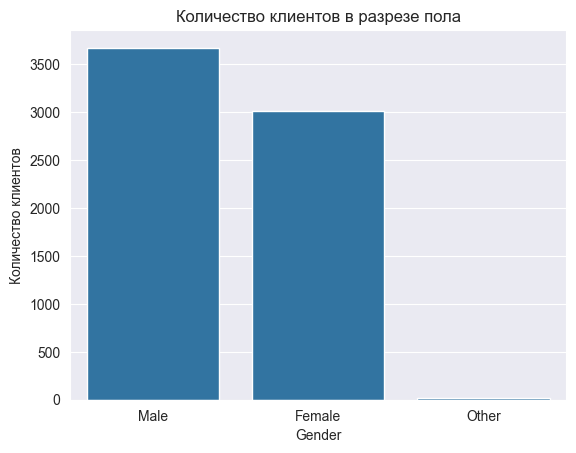

In [20]:
sns.countplot(data=sals, x="Gender")
plt.title("Количество клиентов в разрезе пола")
plt.ylabel("Количество клиентов")
plt.show()

Education Level
Bachelor's Degree    0.338308
Master's Degree      0.234741
PhD                  0.204149
Bachelor's           0.112819
High School          0.066856
Master's             0.042979
phD                  0.000149
Name: proportion, dtype: float64

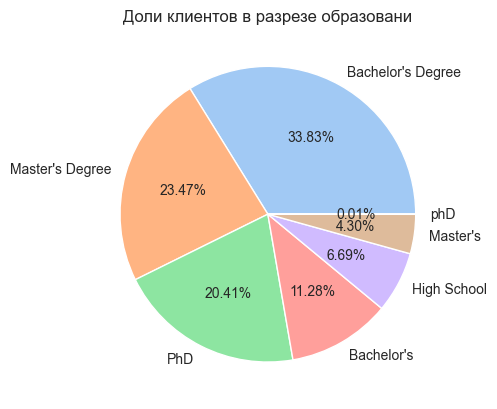

In [23]:
# посчитаем доли клиентов в разрезе бразования
income = sals["Education Level"].value_counts(normalize=True)
display(income)
# зададим цветовую палитру
colors = sns.color_palette('pastel')

plt.pie(income, labels=income.index, colors=colors, autopct='%.2f%%')
plt.title("Доли клиентов в разрезе образовани")
plt.show()

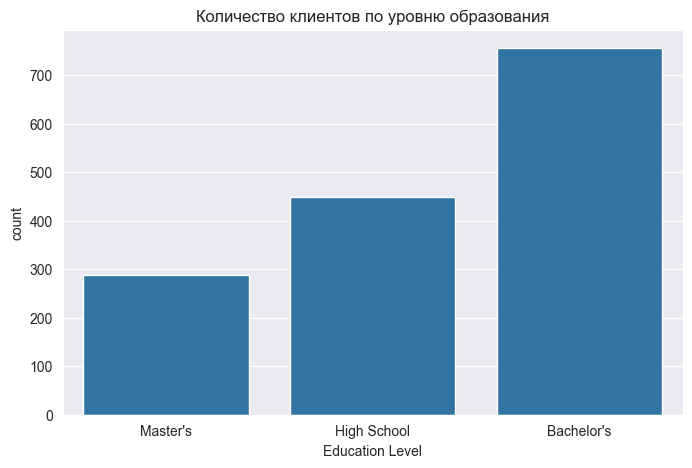

In [26]:
plt.figure(figsize=[8,5])
sns.countplot(data=sals, x="Education Level", order=["Master's", "High School", "Bachelor's"])
plt.title("Количество клиентов по уровню образования")
plt.show()

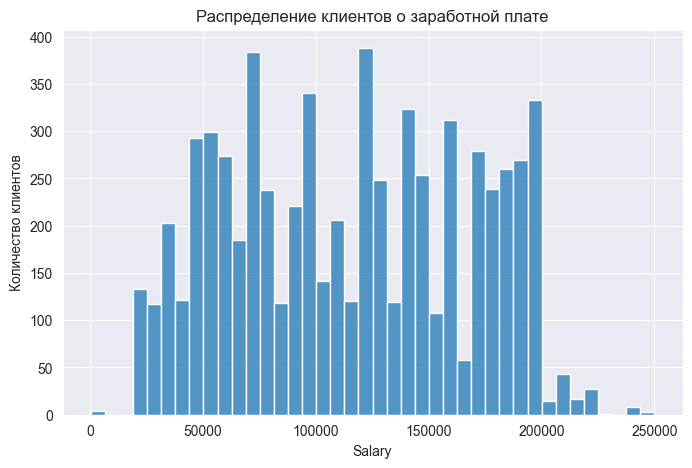

In [28]:
plt.figure(figsize=[8, 5])
sns.histplot(data=sals, x="Salary", bins=40)
plt.title("Распределение клиентов о заработной плате")
plt.ylabel("Количество клиентов")
plt.show()

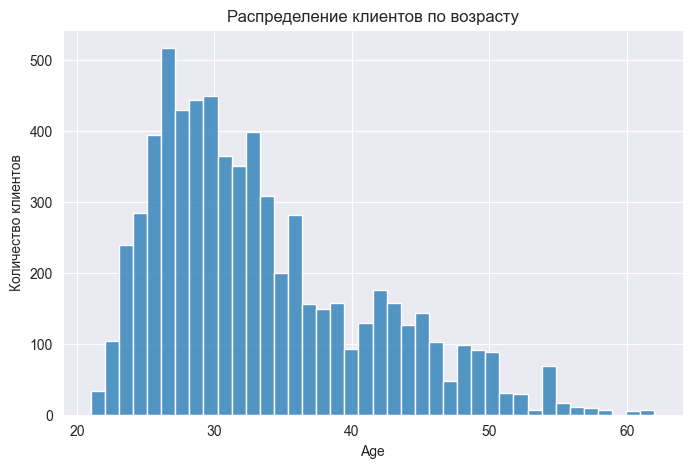

In [30]:
plt.figure(figsize=[8, 5])
sns.histplot(data=sals, x="Age", bins=40)
plt.title("Распределение клиентов по возрасту")
plt.ylabel("Количество клиентов")
plt.show()

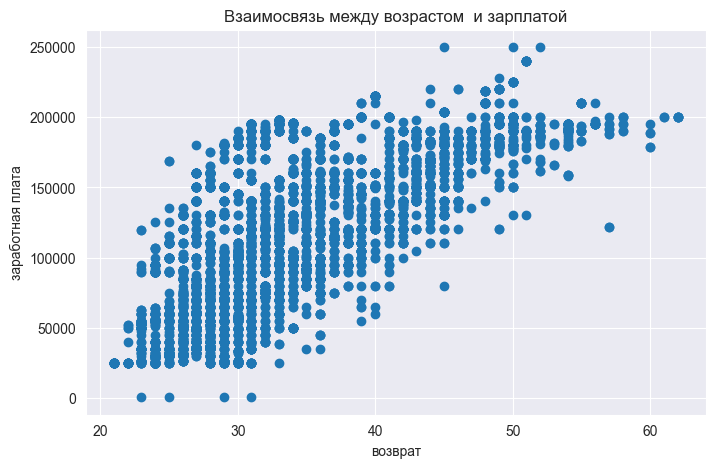

In [31]:
plt.figure(figsize=[8, 5])
plt.scatter(data=sals, x="Age", y="Salary")
plt.title("Взаимосвязь между возрастом  и зарплатой")
plt.ylabel("заработная плата")
plt.xlabel("возврат")
plt.show()

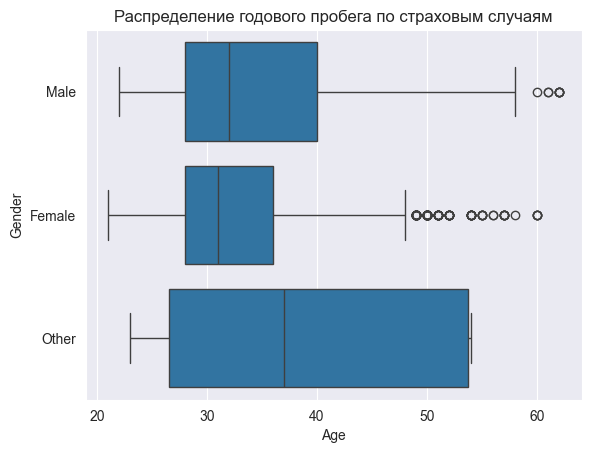

In [34]:
sns.boxplot(data=sals, x='Age', y='Gender')
plt.title("Распределение годового пробега по страховым случаям")
plt.show()